
I recently learned about a formula used to estimate the square root of a number before electronic calculators were in common use.


Approximating Square Roots Formula:

$\\
\sqrt{X} \approx  \frac{X+Y}{2\sqrt{Y}}$


where Y = the perfect square closest to X

For instance:


$
\\
\\
\sqrt{23} \approx  \frac{23+25}{2\sqrt{25}}=4.8
\\
\sqrt{50} \approx  \frac{50+49}{2\sqrt{49}}=7.071$


I was curious to see how accurate it was for smaller and larger numbers. The first thing I needed to do was create a function to find the nearest perfect square to any given number. Since there are an even number of integers in between any two consecutive squares, I didn't need to worry about ties.


In [1]:
from math import floor, ceil, sqrt
import matplotlib.pyplot as plt

In [2]:
def nearest_sq(num):
    root = sqrt(num)
    low = floor(root)**2
    high = ceil(root)**2
    if (num - low) < (high - num):
        near = low
    else:
        near = high
    return near

Next I needed to create a function using the square-root estimator, which was simple enough.

In [3]:
def sq_est(x):
    y = nearest_sq(x)
    return (x + y)/(2 * sqrt(y))

I used a quick for loop to see the results. 

In [4]:
for i in range(1, 30):
  print(i, 'Estimate:', round(sq_est(i), 3), 'Actual:', round(sqrt(i), 3), '  Difference:', round(abs(sq_est(i) - sqrt(i)), 3))

1 Estimate: 1.0 Actual: 1.0   Difference: 0.0
2 Estimate: 1.5 Actual: 1.414   Difference: 0.086
3 Estimate: 1.75 Actual: 1.732   Difference: 0.018
4 Estimate: 2.0 Actual: 2.0   Difference: 0.0
5 Estimate: 2.25 Actual: 2.236   Difference: 0.014
6 Estimate: 2.5 Actual: 2.449   Difference: 0.051
7 Estimate: 2.667 Actual: 2.646   Difference: 0.021
8 Estimate: 2.833 Actual: 2.828   Difference: 0.005
9 Estimate: 3.0 Actual: 3.0   Difference: 0.0
10 Estimate: 3.167 Actual: 3.162   Difference: 0.004
11 Estimate: 3.333 Actual: 3.317   Difference: 0.017
12 Estimate: 3.5 Actual: 3.464   Difference: 0.036
13 Estimate: 3.625 Actual: 3.606   Difference: 0.019
14 Estimate: 3.75 Actual: 3.742   Difference: 0.008
15 Estimate: 3.875 Actual: 3.873   Difference: 0.002
16 Estimate: 4.0 Actual: 4.0   Difference: 0.0
17 Estimate: 4.125 Actual: 4.123   Difference: 0.002
18 Estimate: 4.25 Actual: 4.243   Difference: 0.007
19 Estimate: 4.375 Actual: 4.359   Difference: 0.016
20 Estimate: 4.5 Actual: 4.472   Dif

It looked like the differences generally got smaller as we moved to larger numbers, but a visual guide would be much more insightful

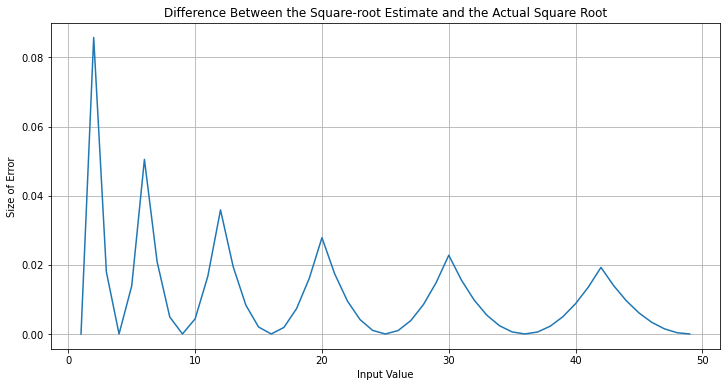

In [5]:
start, end = 1, 50
x_vals = list(range(start, end))
diffs = [abs(sq_est(i) - sqrt(i)) for i in range(start, end)]

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x_vals, diffs)
plt.ylabel('Size of Error')
plt.xlabel('Input Value')
plt.title('Difference Between the Square-root Estimate and the Actual Square Root')
plt.show()


While there was a downward trend overall, there seemed to be local maxima around the halfway points between perfect squares. I decided to mark the perfect squares with green dashed lines to see for a clearer visual.

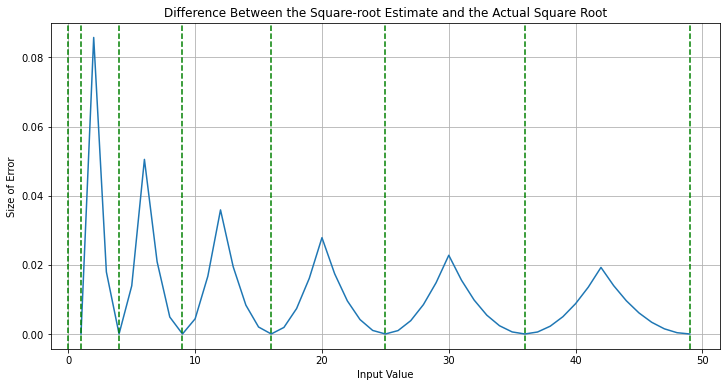

In [6]:
xcoords = [x for x in range(end) if sqrt(x)%1 == 0.0]

plt.figure(figsize=(12,6))
plt.grid()

plt.plot(x_vals, diffs)

for xc in xcoords:
    plt.axvline(x=xc, color='green', linestyle='dashed')
    
plt.ylabel('Size of Error')
plt.xlabel('Input Value')
plt.title('Difference Between the Square-root Estimate and the Actual Square Root')
plt.show()

I wanted to go into even larger numbers to verify that this trend continues.

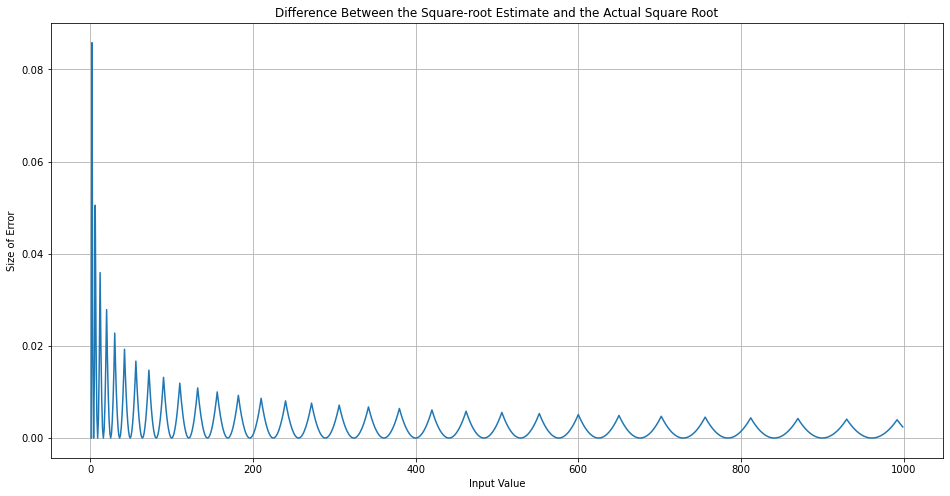

In [7]:
start, end = 1, 1000
x_vals = list(range(start, end))
diffs = [abs(sq_est(i) - sqrt(i)) for i in range(start, end)]

plt.figure(figsize=(16,8))
plt.grid()
plt.plot(x_vals, diffs)
plt.ylabel('Size of Error')
plt.xlabel('Input Value')
plt.title('Difference Between the Square-root Estimate and the Actual Square Root')
plt.show()

Given that the scale of the smaller numbers makes it harder to see the differences for the larger inputs, I decided to zoom in on a smaller portion of the end of the graph.

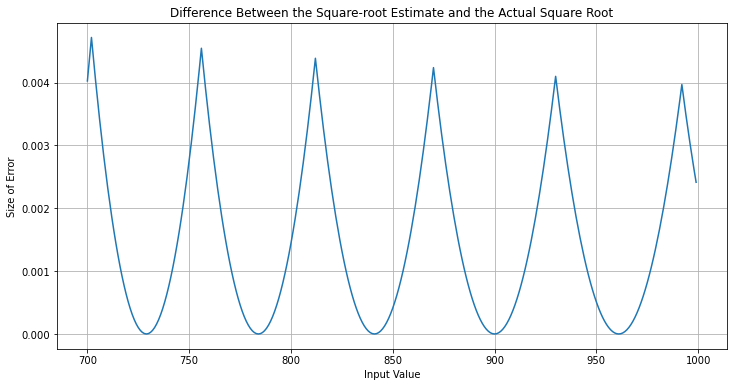

In [8]:
start, end = 700, 1000
x_vals = list(range(start, end))
diffs = [abs(sq_est(i) - sqrt(i)) for i in range(start, end)]

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x_vals, diffs)
plt.ylabel('Size of Error')
plt.xlabel('Input Value')
plt.title('Difference Between the Square-root Estimate and the Actual Square Root')
plt.show()

At this scale it's clear to see that the local peaks are still getting smaller, though with progressively smaller differences.

All in all the formula looks like a pretty great estimation. Even for smaller numbers the errors are less in 0.1, and the errors go below 0.05 pretty quickly after that.

Lastly, I wanted to try to model the peaks in the errors between the perfect squares. I used for loops to create intervals between the perfect squares, then looped through those ranges finding the local maximums in each.

In [9]:
start, end = 1, 101
x_vals = list(range(start, end))
diffs = [abs(sq_est(i) - sqrt(i)) for i in range(start, end)]

squares = [x for x in range(start, end) if sqrt(x)%1 == 0.0]

local_maxes = {}
for i in range(len(squares) - 1):
    x = 0
    y = 0
    for s in range(squares[i], squares[i + 1]):
        dif = abs(sq_est(s) - sqrt(s))
        if dif > y:
            x = s
            y = abs(sq_est(s) - sqrt(s))
    local_maxes[x] = y

x_max = local_maxes.keys()
y_max = local_maxes.values()    
    
#coordinates for local maxima    
for j in x_max:
    print('({}, {})'.format(j, local_maxes[j]))
    

(2, 0.08578643762690485)
(6, 0.05051025721682212)
(12, 0.035898384862245614)
(20, 0.02786404500042039)
(30, 0.02277442494833881)
(42, 0.01925930159213962)
(56, 0.01668522645211734)
(72, 0.01471862576143046)
(90, 0.013167019494861876)


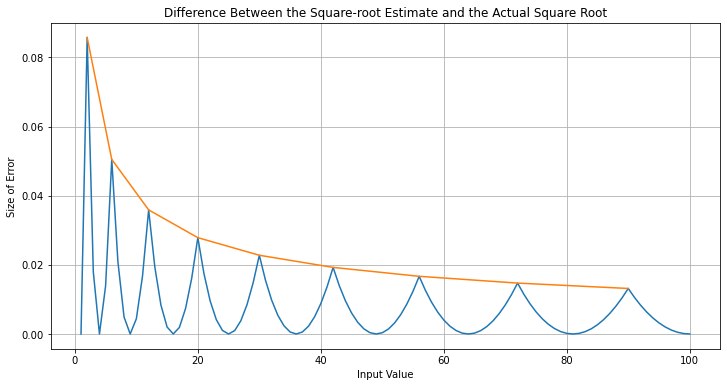

In [10]:

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x_vals, diffs)
plt.plot(x_max, y_max)
plt.ylabel('Size of Error')
plt.xlabel('Input Value')
plt.title('Difference Between the Square-root Estimate and the Actual Square Root')
plt.show()

Through some trial and error, I found that the peaks can be modeled pretty closely by the function y = 1/(8*sqrt(x)) (shown in green)

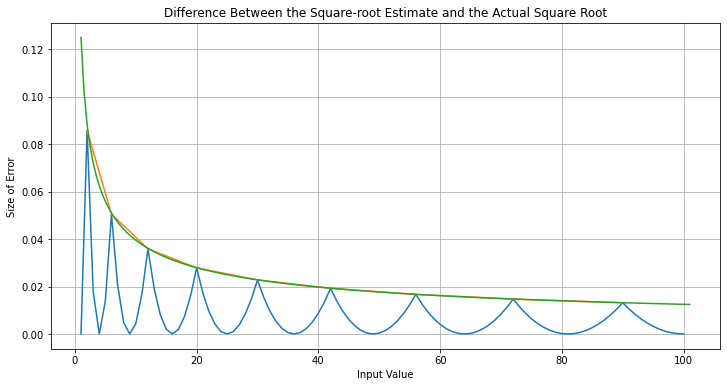

In [11]:
import numpy as np

x_func = np.linspace(start, end, 200)
y_func = [1 / (8 * sqrt(x)) for x in x_func]

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x_vals, diffs)
plt.plot(x_max, y_max)
plt.plot(x_func, y_func)
plt.ylabel('Size of Error')
plt.xlabel('Input Value')
plt.title('Difference Between the Square-root Estimate and the Actual Square Root')
plt.show()
